In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
vims_wave = np.loadtxt('../vims_wave.txt')
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_pickle("../older_data/data'+number+'.pkl")'
    exec(new_string)

vims_wave = np.loadtxt('vims_wave.txt')
new_array = ['0405','0607','0809','1011','1213','1415','1617']
df = {}
for number in new_array:
    df[number] = pd.read_pickle("data/data_%s.pkl"%number)

In [4]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

In [5]:
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = '+'custom_fit(df'+number+')'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)


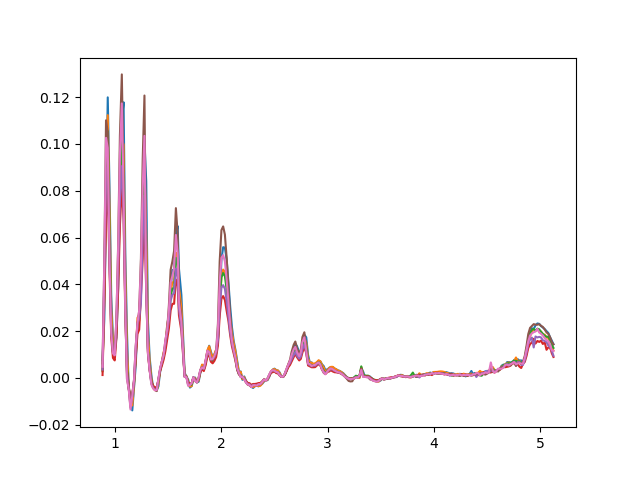

In [6]:
%matplotlib widget
x = vims_wave
for spectrum in spectra_list:
    plt.plot(x,spectrum)
plt.show()

In [7]:
micron = list(range(56,81))

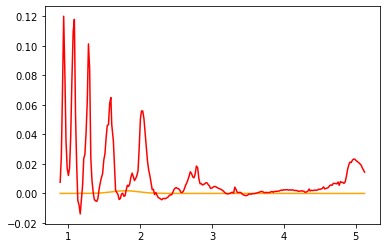

In [9]:
%matplotlib inline
plt.figure(facecolor='white')
x = vims_wave
y = spectra_0405

my_fit,_ = curve_fit(gaussian,x[band_channels],y[band_channels],maxfev=2000)

plt.plot(x,gaussian(x,*my_fit),'orange')
plt.plot(x,y,'r')
plt.show()

In [10]:
window = list(range(56,83))
mean_v = np.average([x[68:69]])

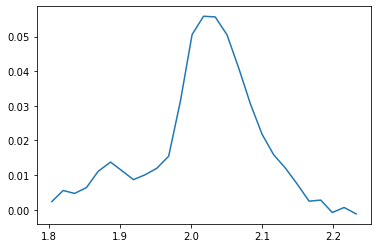

In [13]:
%matplotlib inline
plt.figure(facecolor='white')
plt.plot(x[window],y[window])
plt.show()

In [14]:
print(x[window])

[1.80401 1.82004 1.83616 1.85288 1.86933 1.88679 1.90261 1.91916 1.93545
 1.95191 1.96871 1.98531 2.00167 2.01781 2.03424 2.05091 2.06757 2.084
 2.10034 2.11667 2.13337 2.15018 2.16652 2.18288 2.1992  2.21591 2.23282]


np.sum(np.abs(G(x,a,m,s) - y(x))**2/y_err(x))

In [15]:
_ # Covariance matrix

array([[ 1.91699231e-06,  1.49611103e-04, -9.03298027e-05],
       [ 1.49611103e-04,  1.02246778e-01,  2.28126004e-02],
       [-9.03298027e-05,  2.28126004e-02,  6.92193223e-02]])

In [16]:
print(np.sqrt(np.diag(_))) # Error for each of the coefficients

[0.00138455 0.3197605  0.26309565]


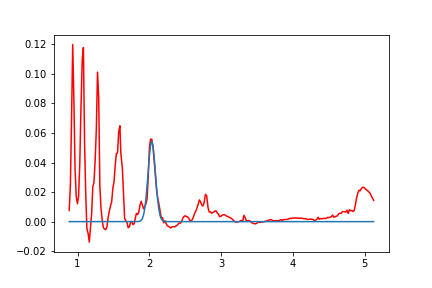

In [17]:
%matplotlib widget
x = vims_wave
y = spectra_0405

mean = np.average(x[68:69]) # Center of the curve
sigma = mean-x[56] # Width of the curve
amp = .06

my_fit,_ = curve_fit(gaussian,x[window],y[window],p0=[amp,mean,sigma]) # Underscore adds covariance matrix 

plt.plot(x,y,c='r')
plt.plot(x,gaussian(x,*my_fit)) # gaussian(x,my_fit[0],my_fit[1],my_fit[2])
plt.show()

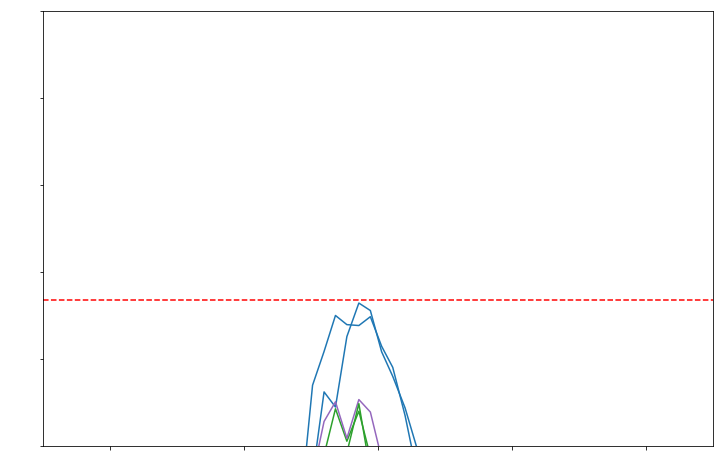

In [34]:
%matplotlib inline
plt.figure(figsize=(12,8))
x = vims_wave
mean_list = []
for spectrum in spectra_list:
    y = spectrum
    my_fit,_ = curve_fit(gaussian,x[window],y[window],p0=[.05,2,.05]) # Underscore adds covariance matrix 
    plt.plot(x,y)
    mean_list.append(my_fit[1])
    plt.plot(x,gaussian(x,*my_fit))
plt.axhline(y=0.02335,color='r',linestyle='--')
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylim([0.02,0.03])
plt.xlim([4.5,5.5])
plt.show()

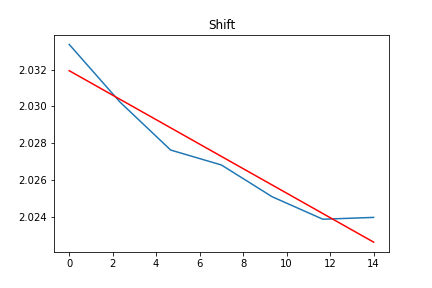

In [19]:
%matplotlib widget

x = np.linspace(0,14,7)
y = mean_list
p = np.polyfit(x,y,1)

fit = np.polyval(p,x)

plt.plot(x,y)
plt.plot(x,fit,c='r')
plt.title("Shift")
plt.show()

In [16]:
print(p)

[-6.64166904e-04  2.03193649e+00]


In [17]:
shift_arr = [0,.004,.0011,.0019,.0026,.0034,.0041,.0049,.0056,.0060,.0060,.0060,.0060,.0070,.0073,.0077,.0080,.0084,.0087,.0091,.0091,.0092,.0093,.0094,.0095,.0096,.0097,.0098]


In [18]:
print(.0098/14, p[0])

0.0007 -0.0006641669043927622


In [19]:
(0.006-0.007)/0.007

-0.14285714285714285

In [20]:
#Testing for this week: run fitting routine on every single spectra (UNAVERAGED), do it much more accurately than with just 7 spectra

In [21]:
len(mean_list)

7